# Prepare a classification model using Naive Bayes 
 


### Import necessary library

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [155]:
# Import dataset
# training data
training_data = pd.read_csv('SalaryData_Train.csv')
training_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Initial analysis

In [156]:
training_data.shape

(30161, 14)

In [157]:
training_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### there is no null values in dataset

In [158]:
training_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [159]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [160]:
# testing data
test_data = pd.read_csv('SalaryData_Test.csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Initial Analysis of testing data

In [161]:
test_data.shape

(15060, 14)

In [162]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### there is no null values in test dataset


In [163]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [164]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


## visualization of data

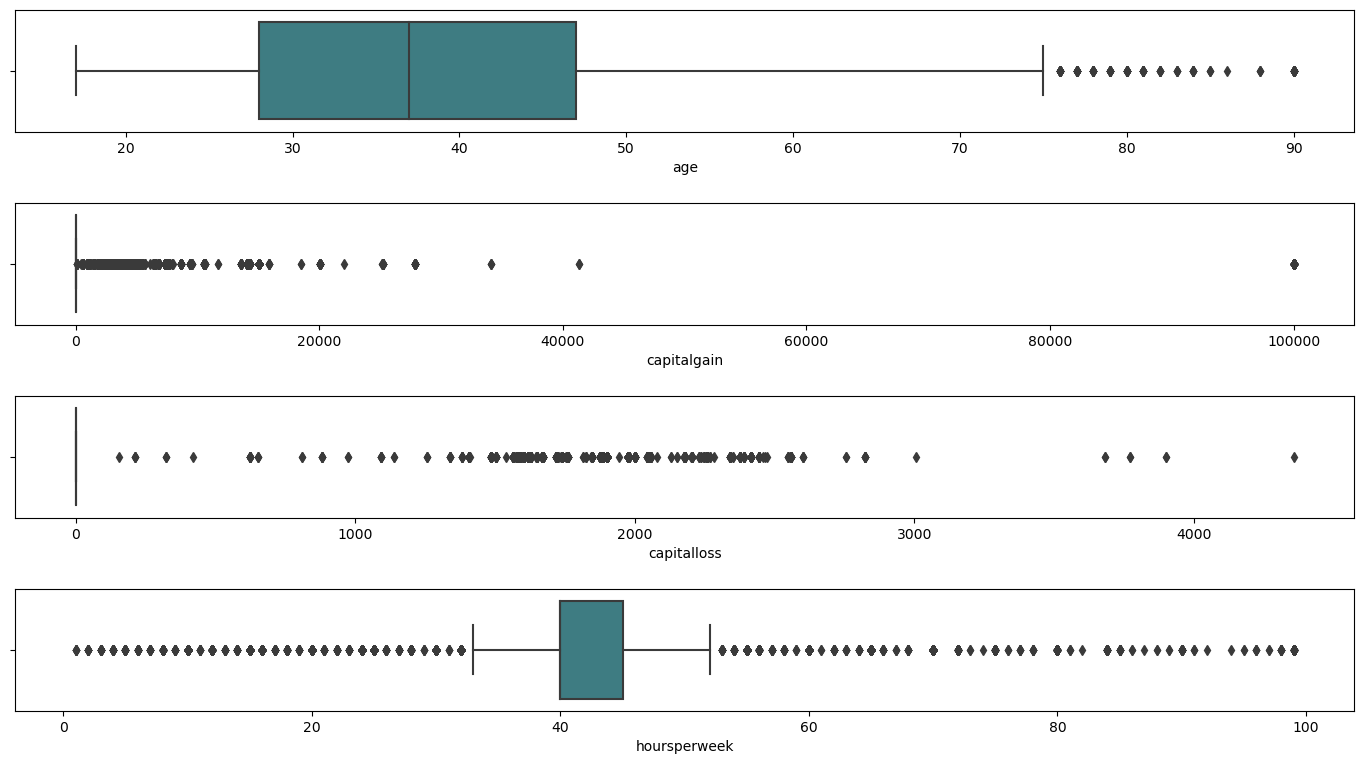

In [165]:
# Outliers Detection
ot=training_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)


#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Bar plot for all categorical variables in the dataset

Text(0.5, 1.0, 'Working Class')

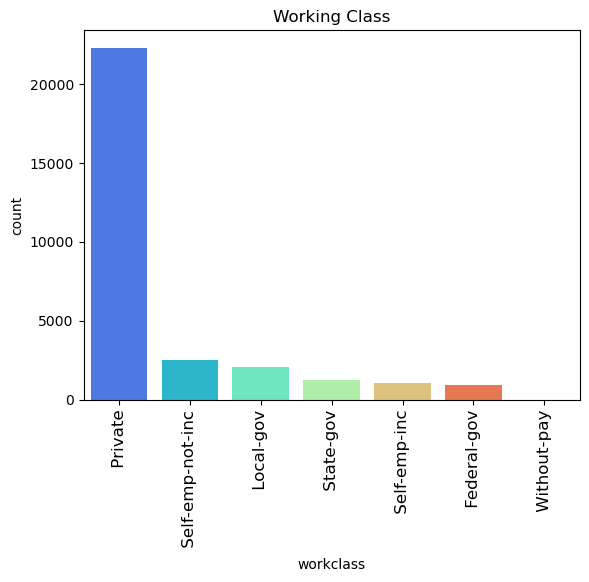

In [166]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=training_data, palette = pal, 
              order=training_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

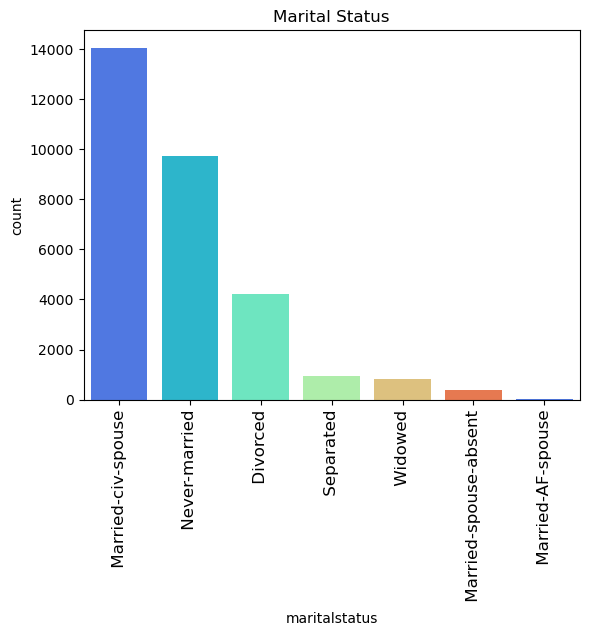

In [167]:
sns.countplot(x='maritalstatus', data=training_data, palette = pal, 
              order=training_data['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

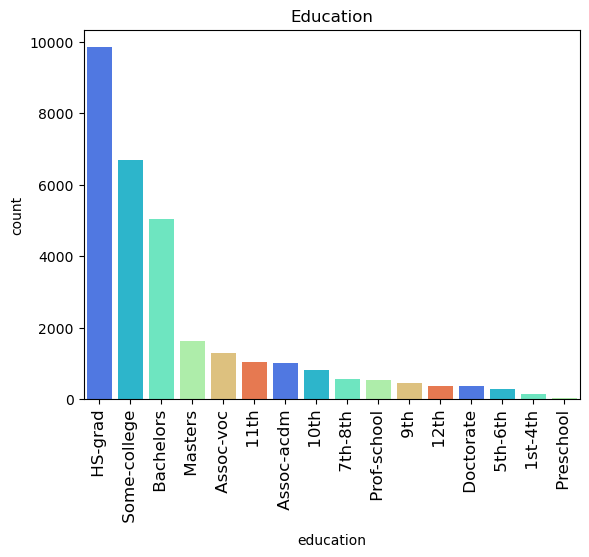

In [168]:
sns.countplot(x='education', data=training_data, palette = pal, 
              order=training_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

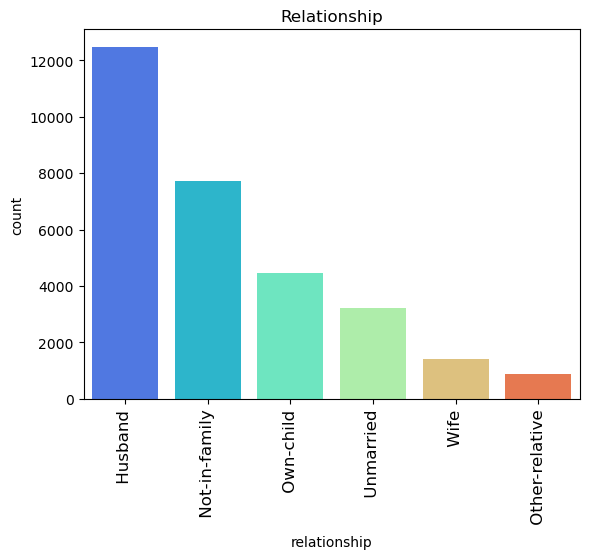

In [169]:
sns.countplot(x='relationship', data=training_data, palette = pal, 
              order=training_data['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Sex')

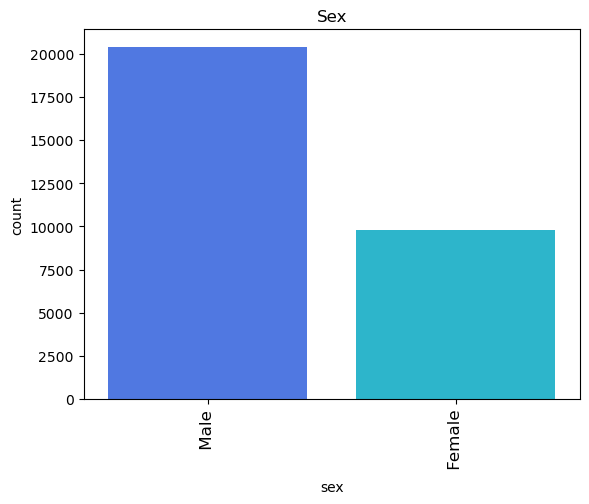

In [170]:
sns.countplot(x='sex', data=training_data, palette = pal, 
              order=training_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Native')

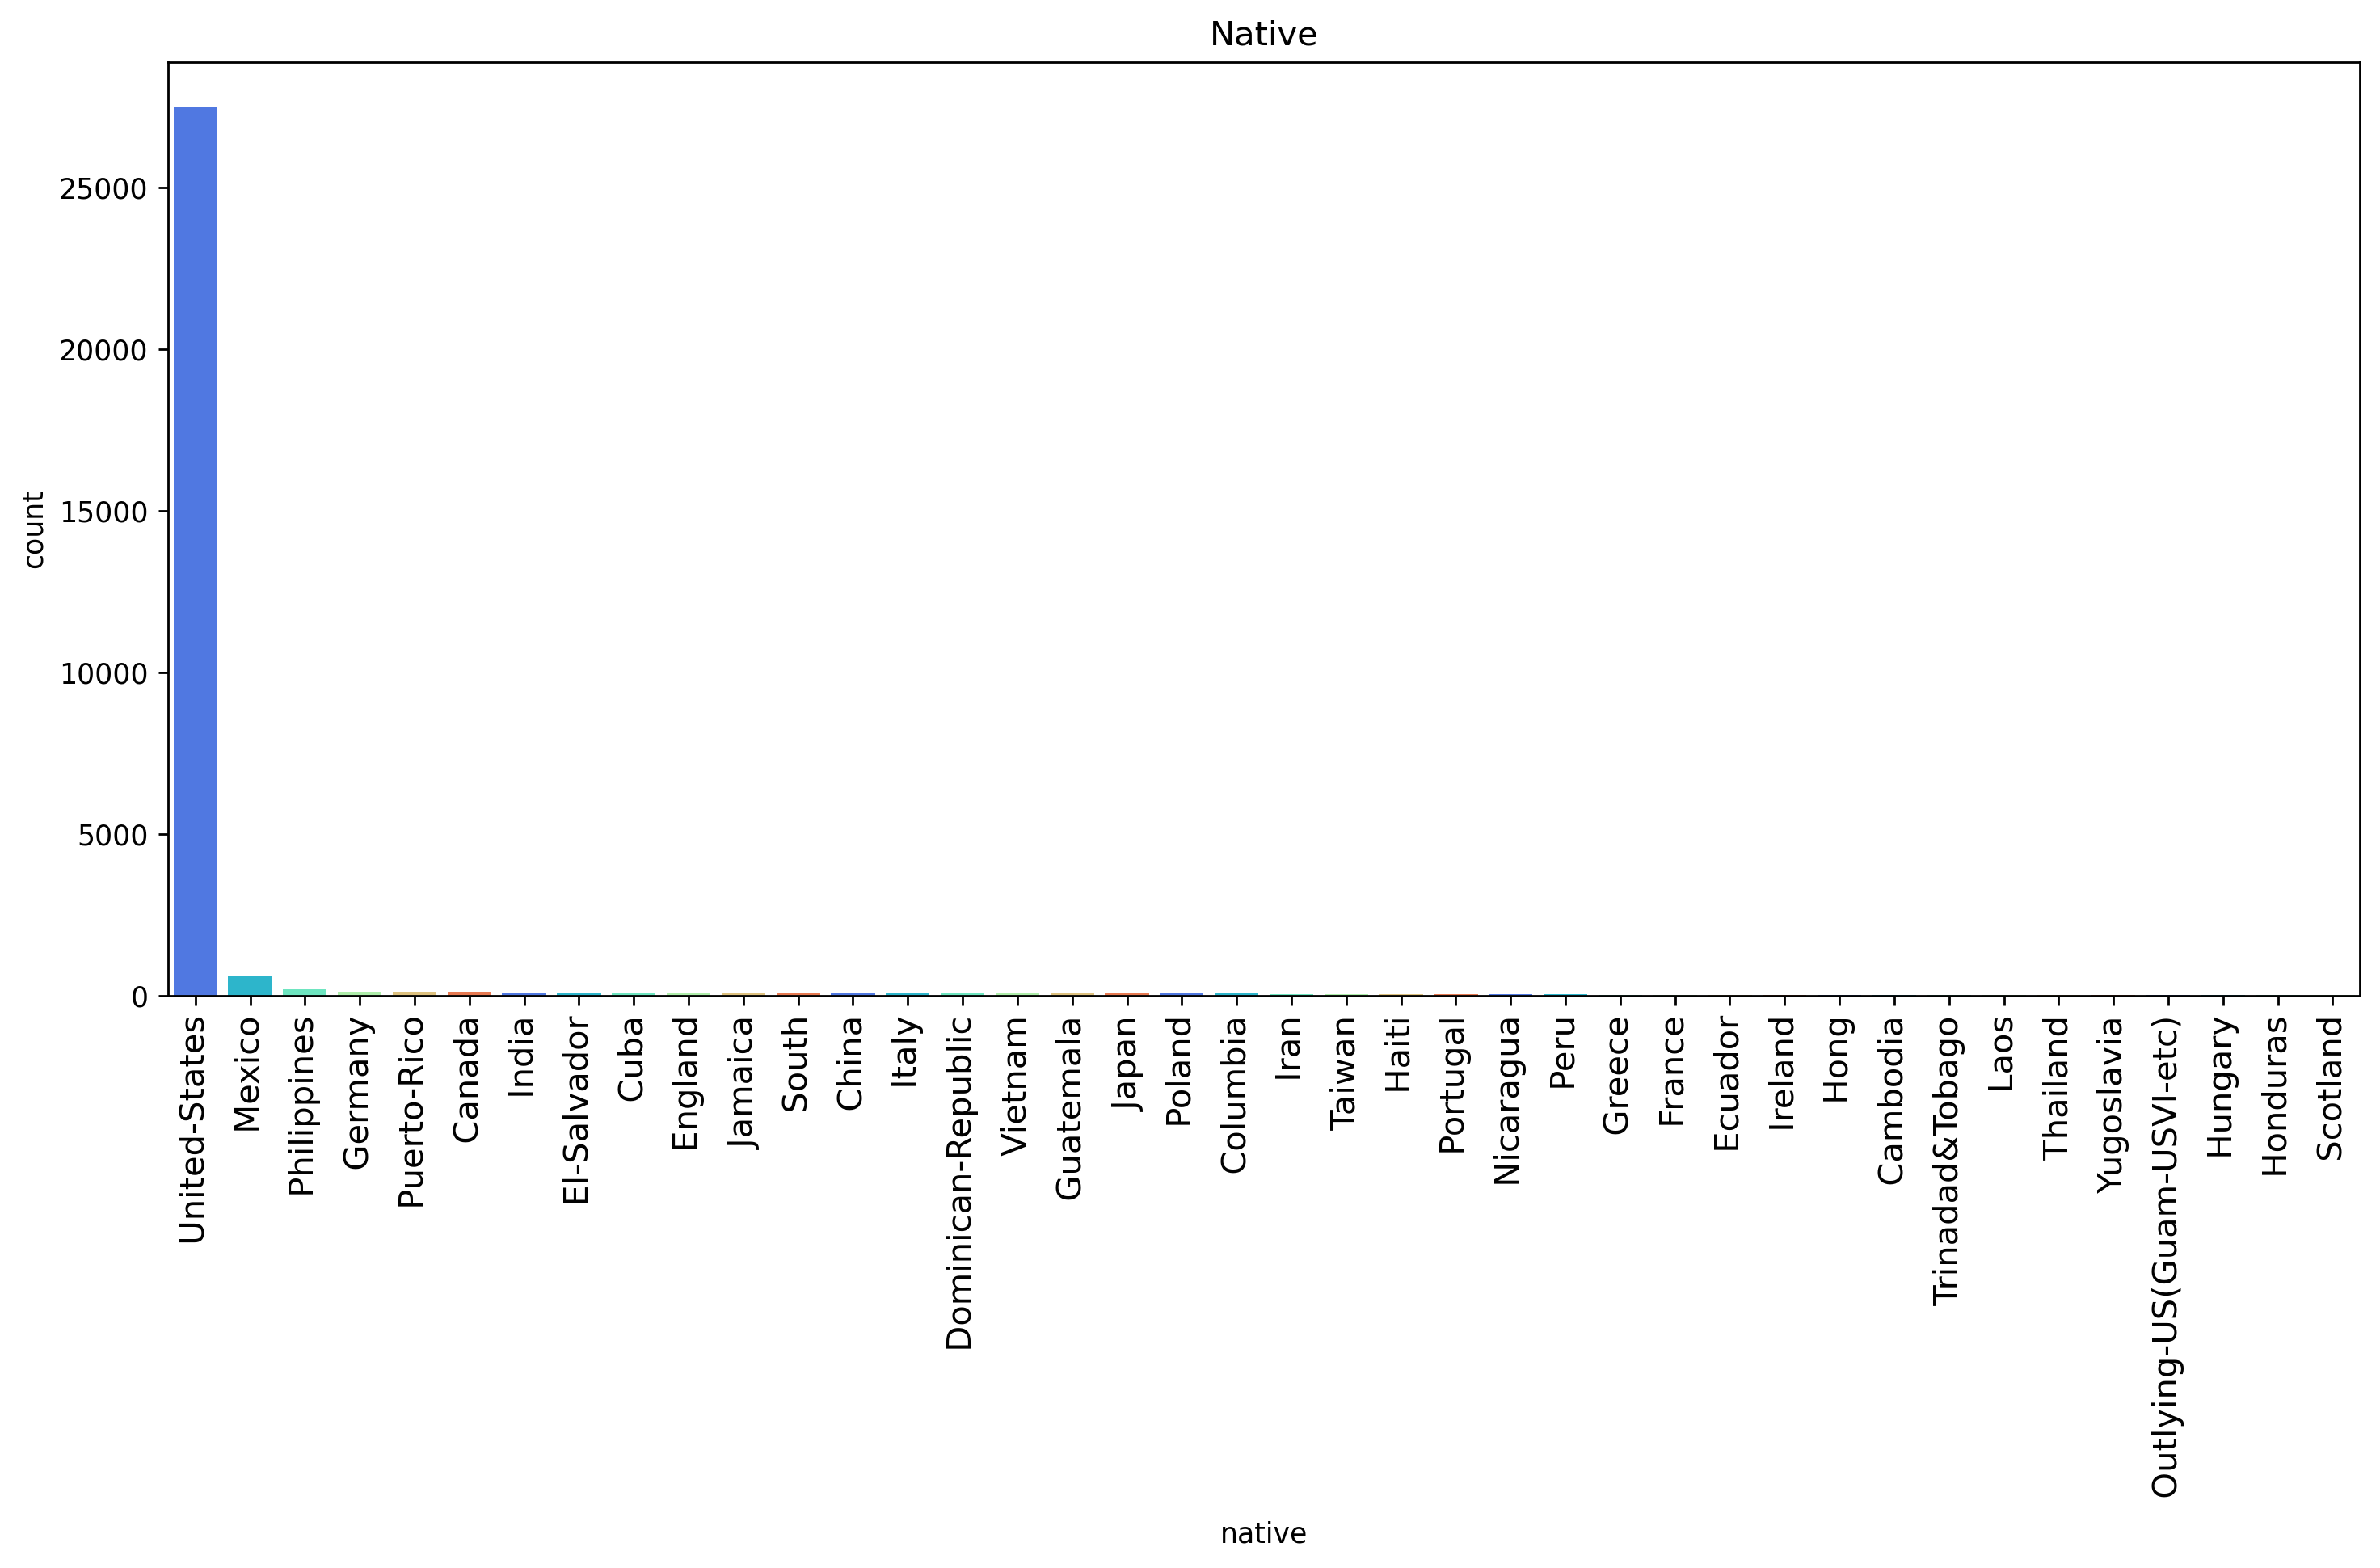

In [171]:
plt.figure(figsize=(14,6),dpi=250)
sns.countplot(x='native', data=training_data, palette = pal, 
              order=training_data['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')

In [172]:
training_data.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [173]:
test_data.Salary.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

<Axes: xlabel='Salary', ylabel='count'>

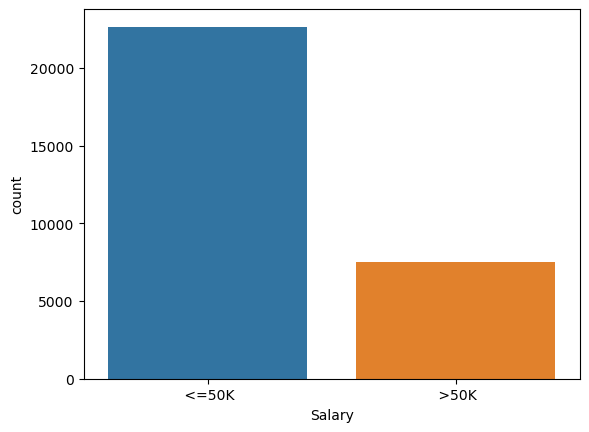

In [174]:
sns.countplot(x = training_data['Salary'])

### salary count is <=50k is greater than salary count of >50k


<Axes: xlabel='Salary', ylabel='count'>

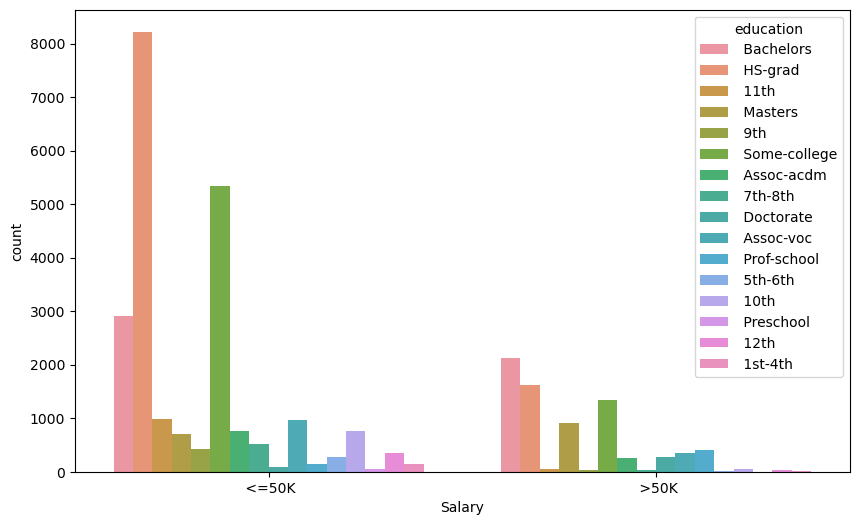

In [175]:
plt.figure(figsize=(10,6))
sns.countplot(x = training_data['Salary'],hue= training_data['education'])

### most of the HS-grad have salary  <=50k

<Axes: xlabel='Salary', ylabel='count'>

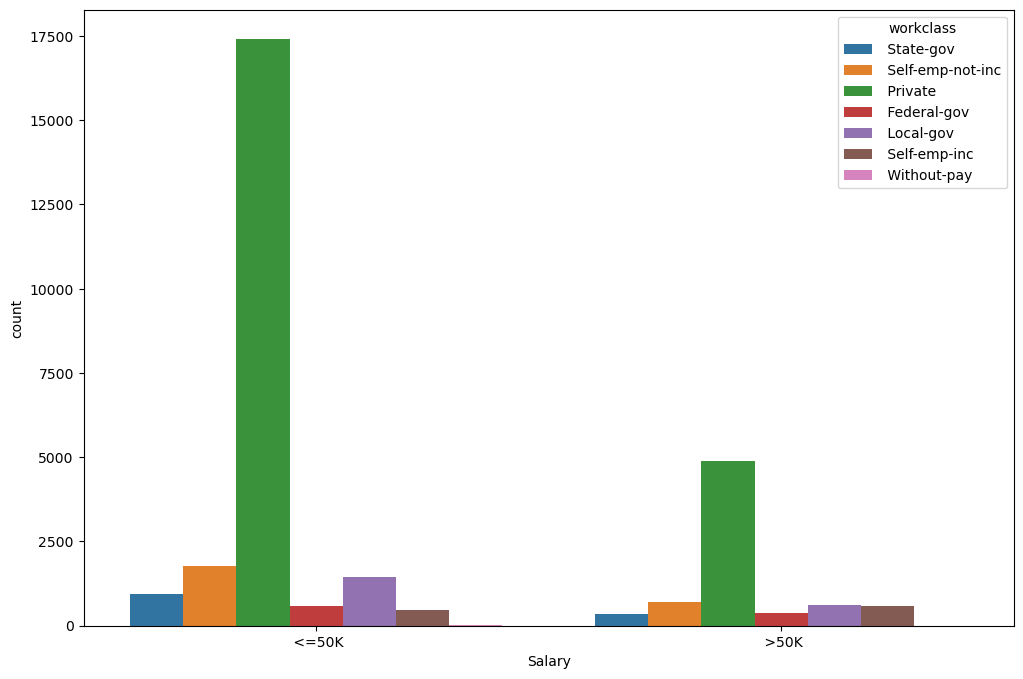

In [176]:
plt.figure(figsize=(12,8))
sns.countplot(x = training_data['Salary'], hue= training_data['workclass'])

### most of private workclass employees have salary <=50k

<Axes: xlabel='Salary', ylabel='count'>

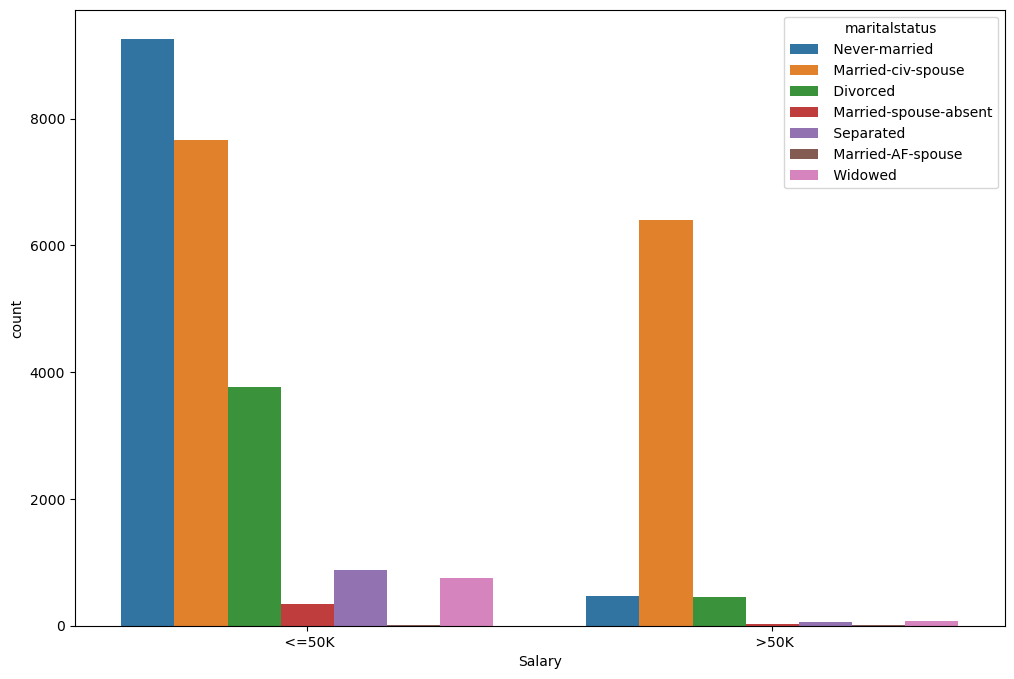

In [177]:
plt.figure(figsize=(12,8))
sns.countplot(x = training_data['Salary'], hue= training_data['maritalstatus'])

### never married employees count is greater for salary  <=50k

<Axes: xlabel='Salary', ylabel='count'>

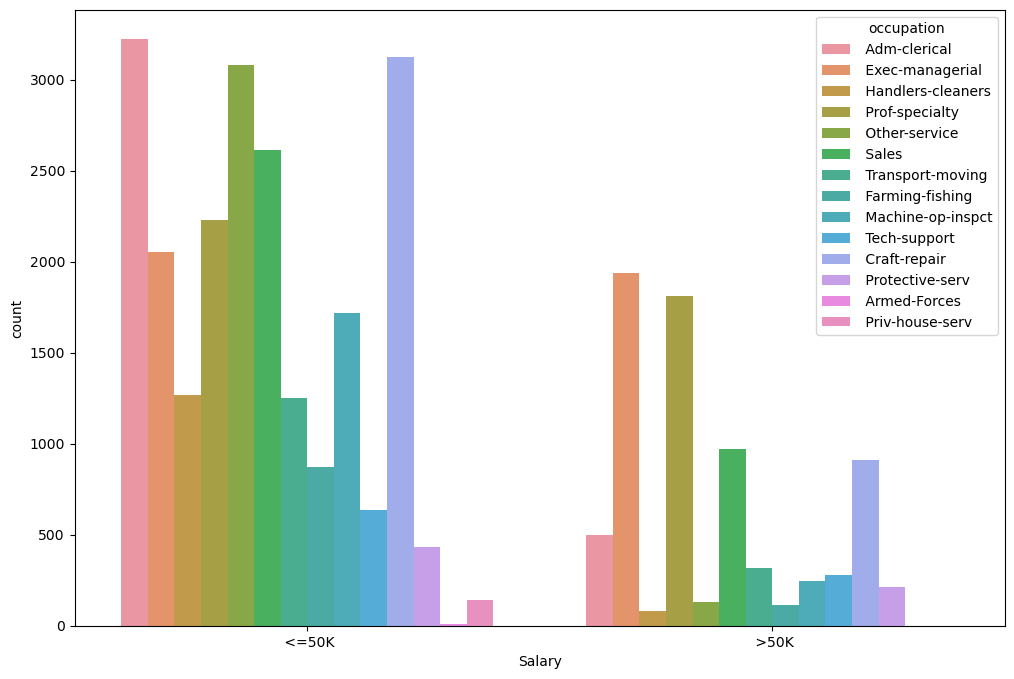

In [178]:
plt.figure(figsize=(12,8))
sns.countplot(x = training_data['Salary'], hue = training_data['occupation'])

### adm-clerical,craft-repair, other-service have high count for salary <=50k

## Labelencoding technique

In [179]:
le = LabelEncoder()
training_data['Salary'] = le.fit_transform(training_data['Salary'])
test_data['Salary'] = le.fit_transform(test_data['Salary'])

In [180]:
training_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [181]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [182]:
training_data = pd.get_dummies(data= training_data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
training_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [183]:
training_data.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek',
       'Salary', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       ...
       'native_ Portugal', 'native_ Puerto-Rico', 'native_ Scotland',
       'native_ South', 'native_ Taiwan', 'native_ Thailand',
       'native_ Trinadad&Tobago', 'native_ United-States', 'native_ Vietnam',
       'native_ Yugoslavia'],
      dtype='object', length=103)

In [184]:
test_data = pd.get_dummies(data= test_data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
test_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


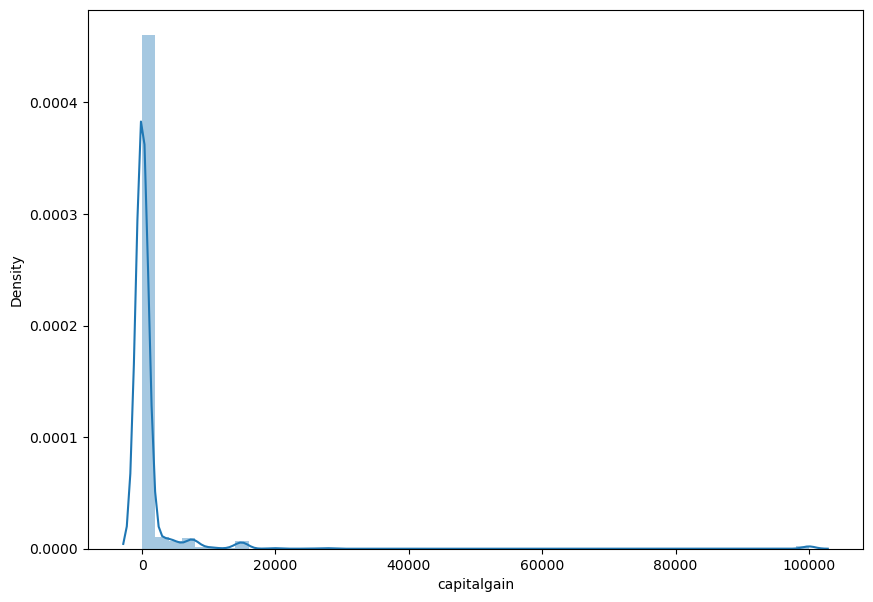

In [185]:
plt.figure(figsize=(10,7))
sns.distplot(training_data['capitalgain'])
plt.show()

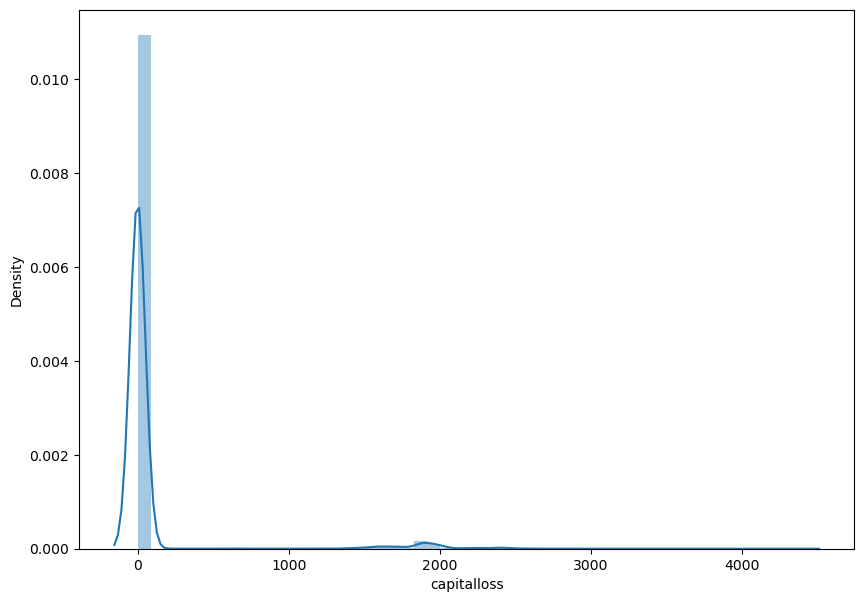

In [186]:
plt.figure(figsize=(10,7))
sns.distplot(training_data['capitalloss'])
plt.show()


# Model building

In [187]:
x_train = training_data.drop(labels= 'Salary', axis = 1)
y_train = training_data[['Salary']]

In [188]:
x_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
y_train.head()

,Salary
0,0
1,0
2,0
3,0
4,0


In [190]:
# testing data
x_test = test_data.drop(labels='Salary',axis = 1)
y_test = test_data['Salary']

In [191]:
x_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [192]:
y_test.head()

0    0
1    0
2    1
3    1
4    0
Name: Salary, dtype: int32

In [193]:
training_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
age,1.000000,0.043525,0.080152,0.060278,0.101598,0.241991,0.056623,0.068252,-0.210483,0.111037,...,0.001061,0.007835,0.000024,0.001922,-0.007879,-0.004940,0.007867,0.016210,-0.017776,0.000657
educationno,0.043525,1.000000,0.124416,0.079691,0.152522,0.335287,0.058244,0.097378,-0.165069,0.078843,...,-0.043058,-0.042084,0.001815,0.017812,0.049129,0.008183,-0.017134,0.127224,-0.010953,-0.001661
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431,0.221195,-0.006300,-0.009625,-0.048182,0.096481,...,-0.003826,-0.006270,-0.002816,-0.002582,0.007639,-0.003502,-0.003603,0.012361,-0.002493,-0.002317
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454,0.150222,0.010416,0.014781,-0.036497,0.031004,...,-0.007341,-0.004551,-0.004174,0.005688,0.005688,-0.005189,0.008857,0.015688,0.000352,-0.005034
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000,0.229480,0.005229,0.001611,-0.095532,0.126254,...,0.003162,-0.012015,0.000689,0.014327,-0.000305,0.012846,-0.007566,0.010667,-0.010381,0.006983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_ Thailand,-0.004940,0.008183,-0.003502,-0.005189,0.012846,-0.003980,-0.004266,-0.006442,-0.008144,0.018051,...,-0.000798,-0.001430,-0.000454,-0.001154,-0.000887,1.000000,-0.000580,-0.076406,-0.001095,-0.000547
native_ Trinadad&Tobago,0.007867,-0.017134,-0.003603,0.008857,-0.007566,-0.007789,-0.004390,-0.001255,0.002165,0.002630,...,-0.000821,-0.001472,-0.000467,-0.001187,-0.000913,-0.000580,1.000000,-0.078622,-0.001127,-0.000563
native_ United-States,0.016210,0.127224,0.012361,0.015688,0.010667,0.040150,0.017525,0.032914,-0.049755,0.007331,...,-0.108085,-0.193767,-0.061455,-0.156286,-0.120145,-0.076406,-0.078622,1.000000,-0.148365,-0.074123
native_ Vietnam,-0.017776,-0.010953,-0.002493,0.000352,-0.010381,-0.018216,-0.000004,-0.003953,0.009370,-0.004973,...,-0.001549,-0.002777,-0.000881,-0.002240,-0.001722,-0.001095,-0.001127,-0.148365,1.000000,-0.001062


(array([  0.5,   2.5,   4.5,   6.5,   8.5,  10.5,  12.5,  14.5,  16.5,
         18.5,  20.5,  22.5,  24.5,  26.5,  28.5,  30.5,  32.5,  34.5,
         36.5,  38.5,  40.5,  42.5,  44.5,  46.5,  48.5,  50.5,  52.5,
         54.5,  56.5,  58.5,  60.5,  62.5,  64.5,  66.5,  68.5,  70.5,
         72.5,  74.5,  76.5,  78.5,  80.5,  82.5,  84.5,  86.5,  88.5,
         90.5,  92.5,  94.5,  96.5,  98.5, 100.5, 102.5]),
 [Text(0.5, 0, 'age'),
  Text(2.5, 0, 'capitalgain'),
  Text(4.5, 0, 'hoursperweek'),
  Text(6.5, 0, 'workclass_ Federal-gov'),
  Text(8.5, 0, 'workclass_ Private'),
  Text(10.5, 0, 'workclass_ Self-emp-not-inc'),
  Text(12.5, 0, 'workclass_ Without-pay'),
  Text(14.5, 0, 'education_ 11th'),
  Text(16.5, 0, 'education_ 1st-4th'),
  Text(18.5, 0, 'education_ 7th-8th'),
  Text(20.5, 0, 'education_ Assoc-acdm'),
  Text(22.5, 0, 'education_ Bachelors'),
  Text(24.5, 0, 'education_ HS-grad'),
  Text(26.5, 0, 'education_ Preschool'),
  Text(28.5, 0, 'education_ Some-college'),
  Text(3

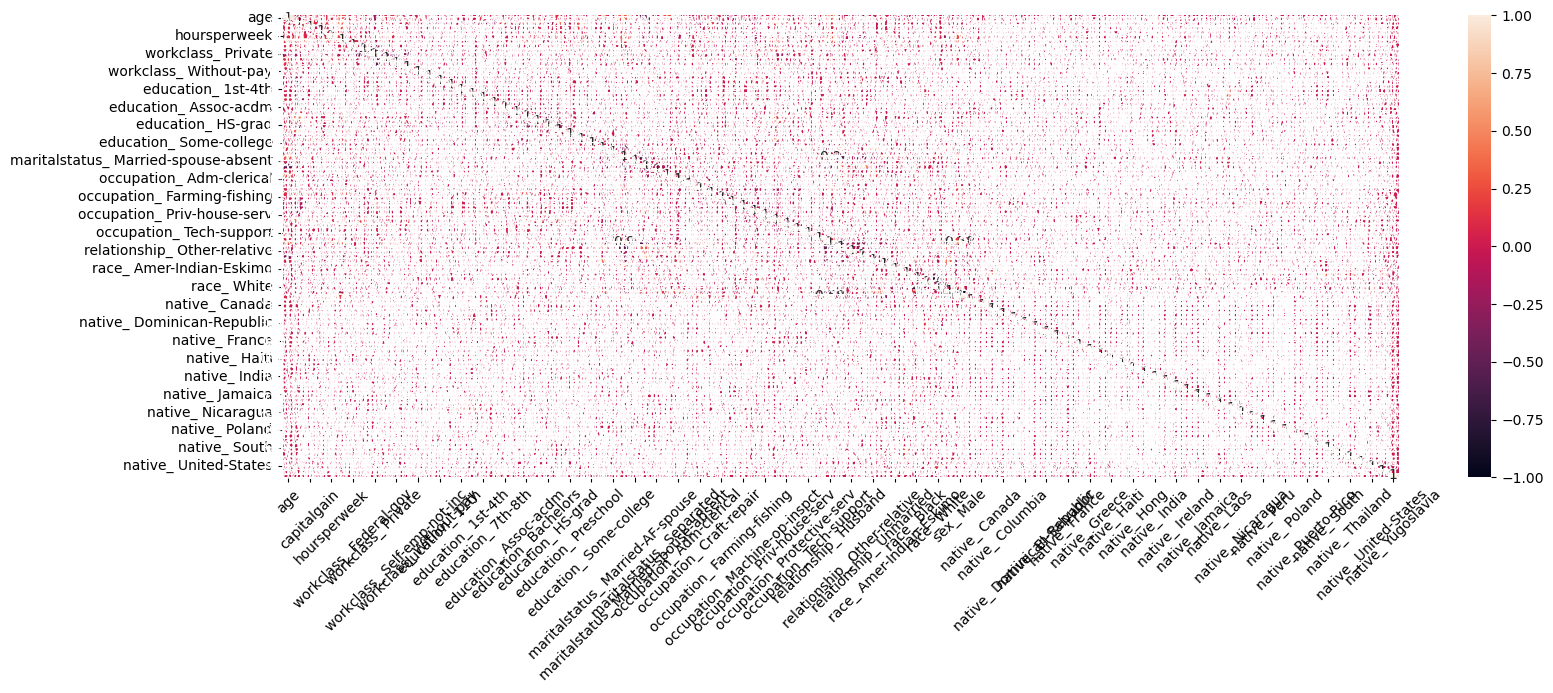

In [194]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(training_data.corr(), annot=True);
plt.xticks(rotation=45)

#### The scatter matrix does not reveal any clear relationship among age, education, capitalgain, capitalloss and Hoursperweek.

## Model training

### Gaussian Naive Bayes

In [195]:
# training model
train_model = gb()
train_model.fit(x_train,y_train)

GaussianNB()

In [196]:
y_train_pred = train_model.predict(x_train)


In [197]:
accuracy_score(y_train,y_train_pred)

0.8031563940187659

In [198]:
confusion_matrix(y_train,y_train_pred)

array([[18151,  4502],
       [ 1435,  6073]], dtype=int64)

In [199]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22653
           1       0.57      0.81      0.67      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.81      0.77     30161
weighted avg       0.84      0.80      0.81     30161



In [200]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22653
           1       0.57      0.81      0.67      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.81      0.77     30161
weighted avg       0.84      0.80      0.81     30161



In [201]:
# testing model
y_test_pred = train_model.predict(x_test)

In [202]:
accuracy_score(y_test,y_test_pred)

0.8029216467463479

In [203]:
confusion_matrix(y_test,y_test_pred)

array([[9073, 2287],
       [ 681, 3019]], dtype=int64)

In [204]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11360
           1       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



In [205]:
print('training data accurancy score is: ',accuracy_score(y_train,y_train_pred))
print('testing data accurancy score is: ',accuracy_score(y_test,y_test_pred))

training data accurancy score is:  0.8031563940187659
testing data accurancy score is:  0.8029216467463479


# Multinominal Naive Bayes

In [206]:
mb_model = mb()
mb_model.fit(x_train,y_train)

MultinomialNB()

In [207]:
y_mb_train = mb_model.predict(x_train)

In [208]:
# training data
accuracy_score(y_train,y_mb_train)

0.7729186698053778

In [209]:
confusion_matrix(y_train,y_mb_train)

array([[21717,   936],
       [ 5913,  1595]], dtype=int64)

In [210]:
print(classification_report(y_train,y_mb_train))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22653
           1       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



In [211]:
# testing data
y_test_mb = mb_model.predict(x_test)

In [212]:
accuracy_score(y_test,y_test_mb)

0.7749667994687915

In [213]:
confusion_matrix(y_test,y_test_mb)

array([[10891,   469],
       [ 2920,   780]], dtype=int64)

In [214]:
print(classification_report(y_test,y_test_mb))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [215]:
print('training accurancy of Multinominal Naive Bayes model: ',accuracy_score(y_train,y_mb_train))
print('testing accurancy of Multinominal Naive Bayes model: ',accuracy_score(y_test,y_test_mb))


training accurancy of Multinominal Naive Bayes model:  0.7729186698053778
testing accurancy of Multinominal Naive Bayes model:  0.7749667994687915


# conclusion:
### comparison between Gaussian Naive Bayes and Multinominal Naive Bayes
#### accuracy score of Gaussian Naive Bayes is greater than the accuracy score for multinomial Naive Bayes